In [1]:
# !pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

In [3]:
def get_total_times(f, times):
    for line in f.readlines():
        if line.startswith("Total time taken by workload = "):
            times["worklodTime"] = float(line.split(' ')[-2])
        elif line.startswith("Total time taken by inserts = "):
            times["insertsTime"] = float(line.split(' ')[-2])
        elif line.startswith("Total time taken by queries = "):
            times["queriesTime"] = float(line.split(' ')[-2])
        elif line.startswith("Total time taken by updates = "):
            times["updatesTime"] = float(line.split(' ')[-2])
        elif line.startswith("Total time taken by range queries = "):
            times["rangeQueriesTime"] = float(line.split(' ')[-2])

In [4]:
experiments = os.listdir()

data = list()

for expdir in experiments:

    if os.path.isfile(expdir):
        continue

    try:
        _, inserts, _, updates, _, memtable, _, prefix_len = expdir.split()
    except:
        _, inserts, _, updates, _, memtable = expdir.split()
        prefix_len = 0

    logfile = os.path.join(expdir, "workload.log")
    times = {
        "inserts": inserts,
        "updates": updates,
        "memtable": memtable.capitalize(),
        "prefixLen": int(prefix_len),
    }
    get_total_times(open(logfile, 'r'), times)
    data.append(dict(times))

In [5]:
df = pd.DataFrame(data=data)

# df = df[df['prefixLen'] <= 7]

In [6]:
df_skip_list = df[df["memtable"]=="Skiplist"]
df_hash_skip_list = df[df["memtable"]=="Hashskiplist"]
df_hash_link_list = df[df["memtable"]=="Hashlinklist"]

df_hash_skip_list = df_hash_skip_list.set_index(df_hash_skip_list["prefixLen"]).sort_index()
df_hash_link_list = df_hash_link_list.set_index(df_hash_link_list["prefixLen"]).sort_index()

In [7]:
df_skip_list

,inserts,updates,memtable,prefixLen,worklodTime,insertsTime,queriesTime,updatesTime
13,900000,100000,Skiplist,0,67.2694,19.6591,47.045,0.0


In [8]:
df_hash_skip_list

,inserts,updates,memtable,prefixLen,worklodTime,insertsTime,queriesTime,updatesTime
prefixLen,,,,,,,,
0,900000,100000,Hashskiplist,0,136.119,21.8409,113.6730,0.0
1,900000,100000,Hashskiplist,1,125.994,15.9117,109.4650,0.0
2,900000,100000,Hashskiplist,2,200.219,13.6901,185.8510,0.0
3,900000,100000,Hashskiplist,3,110.283,13.4443,96.0755,0.0
4,900000,100000,Hashskiplist,4,125.699,14.1957,110.8370,0.0
5,900000,100000,Hashskiplist,5,215.153,12.0829,202.2710,0.0
6,900000,100000,Hashskiplist,6,269.061,11.0582,257.2310,0.0
7,900000,100000,Hashskiplist,7,366.209,11.2529,354.1640,0.0
8,900000,100000,Hashskiplist,8,384.144,11.8521,371.5500,0.0


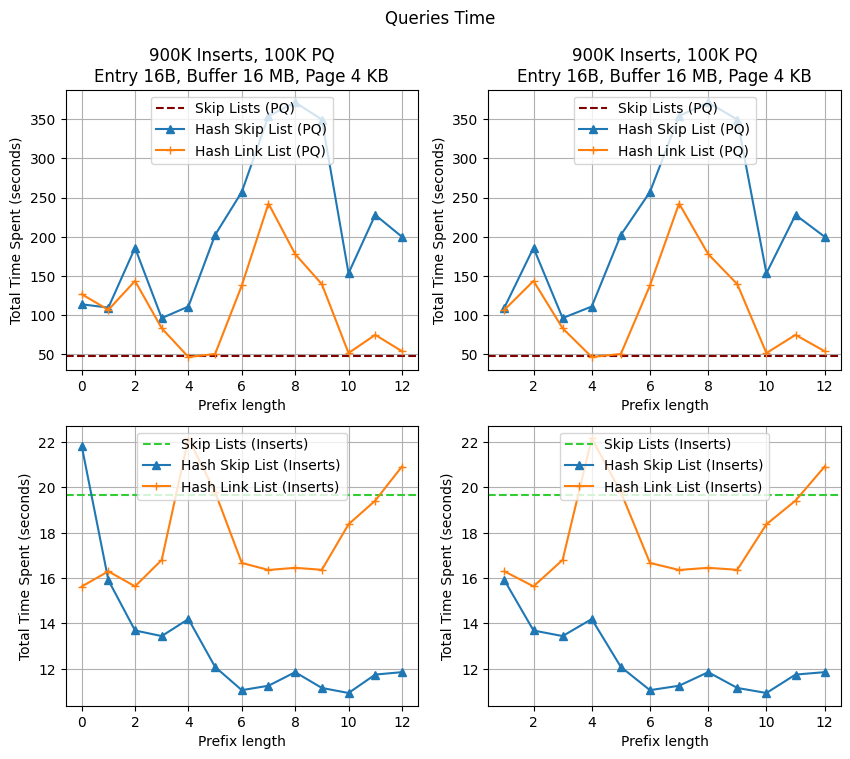

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# fig.suptitle("Inserts Time")
fig.suptitle("Queries Time")

ax[1, 0].axhline(y=df_skip_list["insertsTime"][13], linestyle="--", label="Skip Lists (Inserts)", color='limegreen')
ax[1, 0].plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["insertsTime"], label="Hash Skip List (Inserts)", marker='^')
ax[1, 0].plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["insertsTime"], label="Hash Link List (Inserts)", marker='+')

ax[0, 0].axhline(y=df_skip_list["queriesTime"][13], linestyle="--", label="Skip Lists (PQ)", color="maroon")
ax[0, 0].plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["queriesTime"], label="Hash Skip List (PQ)", marker='^')
ax[0, 0].plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["queriesTime"], label="Hash Link List (PQ)", marker='+')

# ax.axhline(y=df_skip_list["worklodTime"][13], linestyle="--", label="Skip Lists (Workload)")
# ax.plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["worklodTime"], label="Hash Skip List (Workload)")
# ax.plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["worklodTime"], label="Hash Link List (Workload)")

ax[0, 0].set_title("900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
ax[0, 0].set_ylabel("Total Time Spent (seconds)")
ax[0, 0].set_xlabel("Prefix length")
ax[0, 0].legend(loc='upper center')

df_hash_skip_list1 = df_hash_skip_list.drop(index=0)
df_hash_link_list1 = df_hash_link_list.drop(index=0)

ax[1, 1].axhline(y=df_skip_list["insertsTime"][13], linestyle="--", label="Skip Lists (Inserts)", color='limegreen')
ax[1, 1].plot(sorted(df_hash_skip_list1["prefixLen"]), df_hash_skip_list1["insertsTime"], label="Hash Skip List (Inserts)", marker='^')
ax[1, 1].plot(sorted(df_hash_link_list1["prefixLen"]), df_hash_link_list1["insertsTime"], label="Hash Link List (Inserts)", marker='+')

ax[0, 1].axhline(y=df_skip_list["queriesTime"][13], linestyle="--", label="Skip Lists (PQ)", color="maroon")
ax[0, 1].plot(sorted(df_hash_skip_list1["prefixLen"]), df_hash_skip_list1["queriesTime"], label="Hash Skip List (PQ)", marker='^')
ax[0, 1].plot(sorted(df_hash_link_list1["prefixLen"]), df_hash_link_list1["queriesTime"], label="Hash Link List (PQ)", marker='+')

# ax.axhline(y=df_skip_list["worklodTime"][13], linestyle="--", label="Skip Lists (Workload)")
# ax.plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["worklodTime"], label="Hash Skip List (Workload)")
# ax.plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["worklodTime"], label="Hash Link List (Workload)")

ax[0, 1].set_title("900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
ax[0, 1].set_ylabel("Total Time Spent (seconds)")
ax[0, 1].set_xlabel("Prefix length")
ax[0, 1].legend(loc='upper center')


# ax[1, 1].set_title("900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
ax[1, 0].set_ylabel("Total Time Spent (seconds)")
ax[1, 0].set_xlabel("Prefix length")
ax[1, 0].legend(loc='upper center')
ax[1, 1].set_ylabel("Total Time Spent (seconds)")
ax[1, 1].set_xlabel("Prefix length")
ax[1, 1].legend(loc='upper center')
# [0, 3, 5, 7, 9, 10, 12]

ax[0, 0].grid(True)
ax[0, 1].grid(True)
ax[1, 0].grid(True)
ax[1, 1].grid(True)

plt.show()

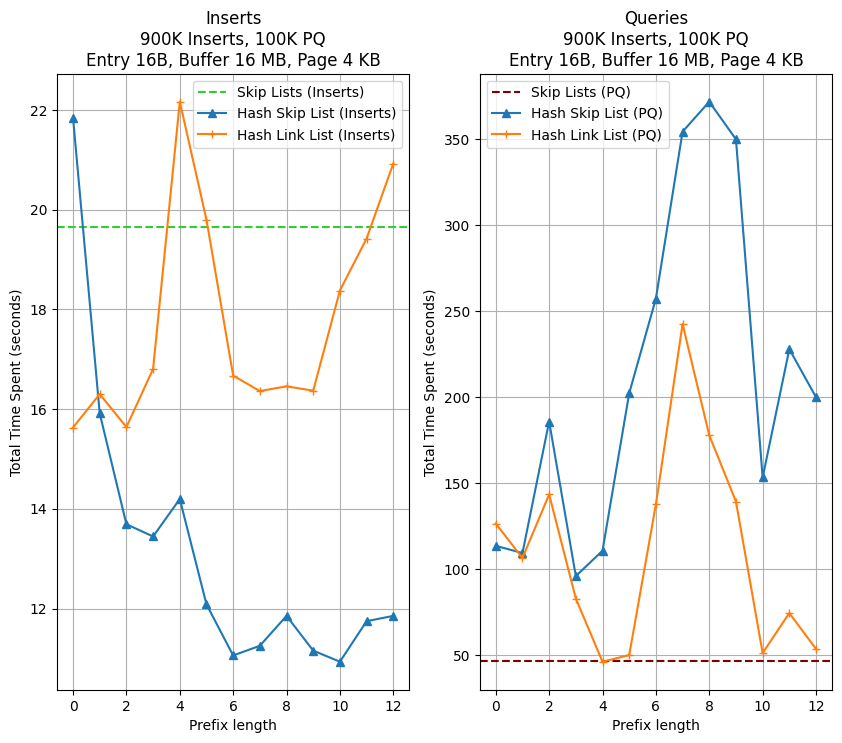

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# # fig.suptitle("Inserts Time")
# fig.suptitle("Queries Time")

ax[0].axhline(y=df_skip_list["insertsTime"][13], linestyle="--", label="Skip Lists (Inserts)", color='limegreen')
ax[0].plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["insertsTime"], label="Hash Skip List (Inserts)", marker='^')
ax[0].plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["insertsTime"], label="Hash Link List (Inserts)", marker='+')

ax[1].axhline(y=df_skip_list["queriesTime"][13], linestyle="--", label="Skip Lists (PQ)", color="maroon")
ax[1].plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["queriesTime"], label="Hash Skip List (PQ)", marker='^')
ax[1].plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["queriesTime"], label="Hash Link List (PQ)", marker='+')

# ax.axhline(y=df_skip_list["worklodTime"][13], linestyle="--", label="Skip Lists (Workload)")
# ax.plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["worklodTime"], label="Hash Skip List (Workload)")
# ax.plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["worklodTime"], label="Hash Link List (Workload)")

ax[0].set_title("Inserts\n900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
ax[0].set_ylabel("Total Time Spent (seconds)")
ax[0].set_xlabel("Prefix length")
ax[0].legend(loc='upper right')

# df_hash_skip_list1 = df_hash_skip_list.drop(index=0)
# df_hash_link_list1 = df_hash_link_list.drop(index=0)

# ax[1, 1].axhline(y=df_skip_list["insertsTime"][13], linestyle="--", label="Skip Lists (Inserts)", color='limegreen')
# ax[1, 1].plot(sorted(df_hash_skip_list1["prefixLen"]), df_hash_skip_list1["insertsTime"], label="Hash Skip List (Inserts)", marker='^')
# ax[1, 1].plot(sorted(df_hash_link_list1["prefixLen"]), df_hash_link_list1["insertsTime"], label="Hash Link List (Inserts)", marker='+')

# ax[0, 1].axhline(y=df_skip_list["queriesTime"][13], linestyle="--", label="Skip Lists (PQ)", color="maroon")
# ax[0, 1].plot(sorted(df_hash_skip_list1["prefixLen"]), df_hash_skip_list1["queriesTime"], label="Hash Skip List (PQ)", marker='^')
# ax[0, 1].plot(sorted(df_hash_link_list1["prefixLen"]), df_hash_link_list1["queriesTime"], label="Hash Link List (PQ)", marker='+')

# # ax.axhline(y=df_skip_list["worklodTime"][13], linestyle="--", label="Skip Lists (Workload)")
# # ax.plot(sorted(df_hash_skip_list["prefixLen"]), df_hash_skip_list["worklodTime"], label="Hash Skip List (Workload)")
# # ax.plot(sorted(df_hash_link_list["prefixLen"]), df_hash_link_list["worklodTime"], label="Hash Link List (Workload)")

# ax[0, 1].set_title("900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
# ax[0, 1].set_ylabel("Total Time Spent (seconds)")
# ax[0, 1].set_xlabel("Prefix length")
# ax[0, 1].legend(loc='upper center')


ax[1].set_title("Queries\n900K Inserts, 100K PQ\nEntry 16B, Buffer 16 MB, Page 4 KB")
# ax[1, 0].set_ylabel("Total Time Spent (seconds)")
# ax[1, 0].set_xlabel("Prefix length")
# ax[1, 0].legend(loc='upper center')
ax[1].set_ylabel("Total Time Spent (seconds)")
ax[1].set_xlabel("Prefix length")
ax[1].legend(loc='upper left')
# [0, 3, 5, 7, 9, 10, 12]

ax[0].grid(True)
# ax[0, 1].grid(True)
ax[1].grid(True)
# ax[1, 1].grid(True)

plt.show()

### Inserts Observation

PrefixLen - [0, 3, 5, 7, 9, 10, 12]

Left plot is for [0, 3, 5, 7, 9, 10, 12]
Right plot is for  [3, 5, 7, 9, 10, 12], I removed zero(prefixLen) to see the scaled view of the others.

Few more details about the experiment.
- The bucket size for HashLinkList is set to 250000 through (`threshold_use_skiplist` parameter which is the threshold used for converting the LinkList bucket into SkipList bucket) -- please not this conversion happens for each bucket separately.
- The data size is 16 B * 900000 = 14.5 MB which can be easily stored into one buffer so, no more flushes to the disk.

Q - Why the zero is so high for HashLinkList?
It is high because for prefixLen 0 we are just mapping everything to one bucket and it can store 250K entries before it will be converted to skiplist. My intution says it we increase the number of entries in one bucket more it will get more worst. (since every PQ to the LinkList has to do O(n) operations it is taking more time)

Q - What about HashSkipList for prefixLen 0?
It is very much comparable to SkipList (It took 3 sec extra). This 3 sec can be because it is doing 1 extra comparison and hash computation before it add the item to the SkipList bucket.

Other Observations:
- The HashLinkList and HashSkipList are giving good performance than SkipList when prefixLex is 3 to 10
- HashSkipList is giving best performance among all others.

